In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import datetime as dt

In [4]:
from matplotlib import pyplot as plt

In [5]:
import seaborn as sns

In [6]:
Claims=pd.read_csv("claims.csv")
Claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [7]:
Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [8]:
Claims['customer_id']=Claims['customer_id'].astype('float64')

In [9]:
Claims['claim_date']=Claims['claim_date'].apply( lambda x:pd.to_datetime(x))

In [10]:
Claims['claim_amount']=Claims['claim_amount'].str.replace('$','')

C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_10728\364078812.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Claims['claim_amount']=Claims['claim_amount'].str.replace('$','')


In [11]:
Claims['claim_amount']=Claims['claim_amount'].astype('float32')

In [12]:
Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   float64       
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float32       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
dtypes: datetime64[ns](1), float32(1), float64(2), int64(1), object(5)
memory usage: 81.8+ KB


In [13]:
Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   float64       
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float32       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
dtypes: datetime64[ns](1), float32(1), float64(2), int64(1), object(5)
memory usage: 81.8+ KB


In [14]:
Claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes
1096,10247193,14818669.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No
1097,79807493,85322831.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes
1098,69299345,73449366.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No


In [15]:
Claims.dropna(axis=0,inplace=True)

In [16]:
Claims.drop_duplicates(inplace=True)

In [17]:
Claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes
1096,10247193,14818669.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No
1097,79807493,85322831.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes
1098,69299345,73449366.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No


In [18]:
Cust_Demo=pd.read_csv('cust_demographics.csv')
Cust_Demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [19]:
Cust_Demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [20]:
Cust_Demo.rename(columns={'CUST_ID':'customer_id'},inplace=True)
Cust_Demo['customer_id']=Cust_Demo['customer_id'].astype('float64')
Cust_Demo

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,19269962.0,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873.0,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152.0,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166.0,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802.0,Female,22-Oct-64,LA,469-345-5617,Silver


In [21]:
Cust_Demo.rename(columns={'DateOfBirth':'DOB'},inplace=True)

In [23]:
Cust_Demo['DOB']=Cust_Demo['DOB'].apply(lambda x:pd.to_datetime(x))

In [24]:
Cust_Demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  1085 non-null   float64       
 1   gender       1085 non-null   object        
 2   DOB          1085 non-null   datetime64[ns]
 3   State        1085 non-null   object        
 4   Contact      1085 non-null   object        
 5   Segment      1085 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 51.0+ KB


In [25]:
Insurance_claims=pd.merge(left=Claims,right=Cust_Demo,on='customer_id',how='outer')
Insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,74787956.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Male,1989-06-19,TX,679-514-5894,Gold
1103,NaN,28528424.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Female,2060-03-02,ND,592-738-9582,Platinum
1104,NaN,71676845.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Male,1994-04-07,IN,549-982-1984,Silver
1105,NaN,74207825.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Female,2065-03-15,MI,173-637-9613,Platinum


In [26]:
Insurance_claims.dropna(axis=0,inplace=True)

In [28]:
Insurance_claims.drop_duplicates(keep='first',inplace=True)

In [29]:
Insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum
1007,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver
1008,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold
1009,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,469-345-5617,Silver


In [30]:
Insurance_claims["flag"] = np.where(Insurance_claims.police_report == 'No',0,np.where(Insurance_claims.police_report == "Yes",1,np.nan))


In [31]:
Insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment,flag
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0.0
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,NaN
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0.0
3,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0.0
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,1.0
1007,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,0.0
1008,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,1.0
1009,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,469-345-5617,Silver,0.0


In [33]:
Insurance_claims.drop_duplicates(subset=['customer_id'],keep='first',inplace=True)

In [34]:
Insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment,flag
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0.0
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,NaN
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0.0
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0.0
6,22890252.0,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,1.0
1007,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,0.0
1008,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,1.0
1009,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,469-345-5617,Silver,0.0


In [35]:
cat_col = ["incident_cause","claim_area","claim_type","fraudulent","flag",'total_policy_claims']
con_col = ['claim_amount']
#claimid, claim_date

for col in cat_col:
    Insurance_claims[col] = Insurance_claims[col].fillna(Insurance_claims[col].mode()[0])
    
Insurance_claims[con_col] = Insurance_claims[con_col].fillna(Insurance_claims[con_col].mean())

Insurance_claims.head()


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment,flag
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0.0
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,0.0
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0.0
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0.0
6,22890252.0,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0.0


In [36]:
Insurance_claims["Age"] = abs(round((Insurance_claims.claim_date - Insurance_claims.DOB).apply(lambda x: x.days)/365.25, 0))
Insurance_claims.head(15)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment,flag,Age
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0.0,39.0
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,0.0,51.0
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0.0,34.0
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0.0,32.0
6,22890252.0,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0.0,41.0
8,24050443.0,21831191.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17,NH,419-712-8513,Gold,0.0,40.0
10,12878692.0,18401412.0,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,0.0,19.0
11,27026412.0,73486606.0,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,Male,1999-10-25,AK,256-968-9172,Silver,0.0,18.0
12,43908336.0,32813689.0,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,Male,1993-10-12,ID,142-324-7481,Silver,0.0,24.0
13,63246959.0,33507197.0,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,Female,2066-09-09,RI,165-519-4583,Gold,0.0,49.0


In [37]:
Insurance_claims['Age_grp'] = np.where(Insurance_claims.Age <18,'Childen',np.where(Insurance_claims.Age<30,'Youth',np.where(Insurance_claims.Age<60,'Adult','Senior')))
Insurance_claims.groupby('Age_grp').count()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment,flag,Age
Age_grp,,,,,,,,,,,,,,,,,
Adult,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707
Childen,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Youth,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295


In [38]:
Insurance_claims.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12643.390625
Platinum    12426.603516
Silver      12284.386719
Name: claim_amount, dtype: float32

In [42]:
Insurance_claims.loc[Insurance_claims.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                  662110.0
total_Driver error          3112550.0
total_Natural causes        1181891.5
total_Other causes          3486969.0
total_Other driver error    3053360.0
Name: claim_amount, dtype: float32

In [47]:
Insurance_claims.loc[(Insurance_claims.incident_cause.str.lower().str.contains("driver"))
             & (Insurance_claims.State.isin(['TX','DE','AK'])) 
                     & (Insurance_claims.Age_grp == 'Adult'),:].groupby(by = "State")['total_policy_claims'].count()

State
AK    6
DE    7
TX    7
Name: total_policy_claims, dtype: int64

In [55]:
F1=Insurance_claims.groupby(by=['gender','Segment'])['claim_amount'].sum().reset_index()
F1.head(5)

,gender,Segment,claim_amount
0,Female,Gold,1937899.0
1,Female,Platinum,2278700.0
2,Female,Silver,1736442.0
3,Male,Gold,2398784.0
4,Male,Platinum,1996051.5


In [57]:
py_chart=F1.pivot(index='Segment',columns='gender',values='claim_amount')
py_chart

gender,Female,Male
Segment,,
Gold,1937899.0,2398784.0
Platinum,2278700.0,1996051.5
Silver,1736442.0,2157708.5


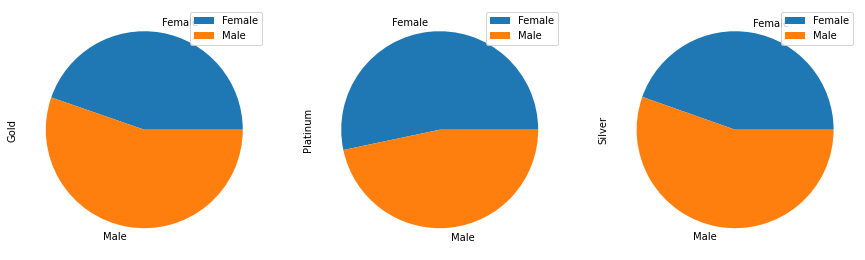

In [60]:
py_chart.T.plot(kind='pie',subplots=True,figsize=(15,8))
plt.show()

In [65]:
F2=Insurance_claims.loc[(Insurance_claims.incident_cause.str.lower().str.contains('driver')
                        )].groupby('gender')[['gender']].count().add_prefix('Count of_').reset_index()
F2

,gender,Count of_gender
0,Female,204
1,Male,261


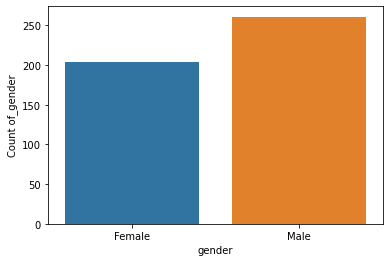

In [66]:
sns.barplot(x='gender',y='Count of_gender',data=F2)
plt.show()

In [68]:
G3=Insurance_claims.groupby('Age_grp')[['fraudulent']].count().reset_index()
G3

,Age_grp,fraudulent
0,Adult,707
1,Childen,2
2,Youth,295


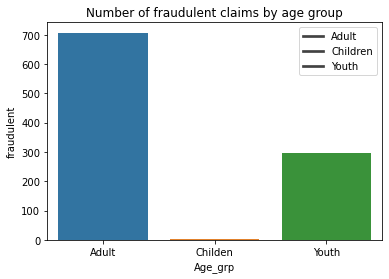

In [69]:
sns.barplot(x='Age_grp',y='fraudulent',data=G3)
plt.legend(['Adult','Children','Youth'])
plt.title('Number of fraudulent claims by age group')
plt.show()

In [71]:
V3=pd.DataFrame(Insurance_claims.groupby(Insurance_claims['claim_date'].dt.month).claim_amount.sum().reset_index())
V3.columns=['Claim_Month','claim_amount']
V3.head()

,Claim_Month,claim_amount
0,1,1243588.5
1,2,1064645.0
2,3,1237921.5
3,4,1248750.5
4,5,1014447.5


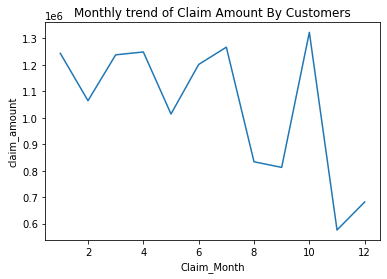

In [72]:
B1= sns.lineplot(x = 'Claim_Month', y = 'claim_amount',data = V3)
plt.title('Monthly trend of Claim Amount By Customers')
plt.show()

In [73]:
H4 = Insurance_claims.groupby(['gender','Age_grp','fraudulent']).claim_amount.sum().reset_index()
H4

,gender,Age_grp,fraudulent,claim_amount
0,Female,Adult,No,3259420.0
1,Female,Adult,Yes,1048846.0
2,Female,Childen,No,20200.0
3,Female,Youth,No,1402970.0
4,Female,Youth,Yes,221605.0
5,Male,Adult,No,3380440.0
6,Male,Adult,Yes,1366280.5
7,Male,Childen,No,24610.0
8,Male,Youth,No,1412650.0
9,Male,Youth,Yes,368563.5


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


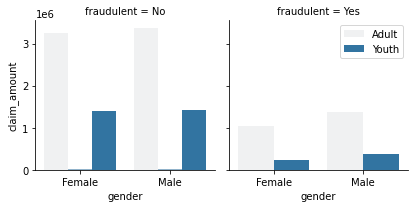

In [77]:
N2 = sns.FacetGrid(data = H4, col = 'fraudulent')
N2.map(sns.barplot,'gender', 'claim_amount','Age_grp')
plt.legend()
plt.show()


## Hypothesis Testing

In [78]:
male_claim=Insurance_claims.loc[Insurance_claims.gender=='Male','claim_amount']
female_claim=Insurance_claims.loc[Insurance_claims.gender=='Female','claim_amount']

In [80]:
print('Mean of Male claim amount:',male_claim.mean())
print('Mean of Female claim amount: ',female_claim.mean())

Mean of Male claim amount: 12822.982421875
Mean of Female claim amount:  12075.1337890625


In [83]:
stats.ttest_ind(male_claim,female_claim)

Ttest_indResult(statistic=0.8598772044326245, pvalue=0.3900624156831122)

In [82]:
from scipy import stats

### Relationship  between age category and segment


In [85]:
D1=pd.crosstab(Insurance_claims.Age_grp,Insurance_claims.Segment)
D1

Segment,Gold,Platinum,Silver
Age_grp,,,
Adult,250,229,228
Childen,1,1,0
Youth,92,114,89


In [86]:
stats.chi2_contingency(D1)

(4.647244565841143,
 0.325443293612907,
 4,
 array([[241.53486056, 242.23904382, 223.22609562],
        [  0.68326693,   0.68525896,   0.6314741 ],
        [100.78187251, 101.07569721,  93.14243028]]))

## Q18

In [87]:
print('Max Date:',Insurance_claims.claim_date.max())
print('Min Date:',Insurance_claims.claim_date.min())


Max Date: 2018-10-30 00:00:00
Min Date: 2017-01-01 00:00:00


In [89]:
T1=Insurance_claims[(Insurance_claims.claim_date>'2017-01-01') & (Insurance_claims.claim_date<'2018-01-01')]
T1.head()


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment,flag,Age,Age_grp
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0.0,39.0,Adult
8,24050443.0,21831191.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17,NH,419-712-8513,Gold,0.0,40.0,Adult
13,63246959.0,33507197.0,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,Female,2066-09-09,RI,165-519-4583,Gold,0.0,49.0,Adult
15,28564401.0,51583214.0,Other driver error,2017-12-10,Auto,Unknown,Material and injury,16690.0,1.0,No,Male,1999-10-31,NH,743-486-5264,Platinum,0.0,18.0,Youth
21,7809917.0,63916778.0,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,Male,2066-09-07,IL,146-157-4572,Platinum,0.0,49.0,Adult


In [93]:
print('Current Year Claim Amount Average:', round(T1.claim_amount.mean(),2))

Current Year Claim Amount Average: 12182.08


In [94]:
stats.ttest_1samp(T1.claim_amount,10000)

Ttest_1sampResult(statistic=3.7433237596278555, pvalue=0.00020078464417703547)

## Q19


In [95]:
Insurance_claims.Age_grp.unique()
adult_claim = Insurance_claims.loc[Insurance_claims.Age_grp == 'Adult','claim_amount']
youth_claim = Insurance_claims.loc[Insurance_claims.Age_grp == 'Youth','claim_amount']
children_claim = Insurance_claims.loc[Insurance_claims.Age_grp == 'Childen','claim_amount']

In [96]:
print('Mean of Adult Claimed Amount : ',adult_claim.mean())
print('Mean of Youth Claimed Amount: ',youth_claim.mean())
print('Mean of Children Claimed Amount: ',children_claim.mean())

Mean of Adult Claimed Amount :  12807.62109375
Mean of Youth Claimed Amount:  11545.0458984375
Mean of Children Claimed Amount:  22405.0


In [97]:
stats.f_oneway(adult_claim,youth_claim,children_claim)

F_onewayResult(statistic=1.3981713450056141, pvalue=0.24753035840017185)

# #Q20

In [98]:
stats.pearsonr(Insurance_claims.total_policy_claims, Insurance_claims.claim_amount)

(-0.014822956274526438, 0.6389836766917203)